In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

ImportError: cannot import name '_OneToOneFeatureMixin' from 'sklearn.base' (c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py)

In [58]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')

In [3]:
#Train Data

df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
#Test Data 

df_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [5]:
df_train.shape, df_test.shape

((31647, 18), (13564, 17))

In [6]:
df_train.columns 

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [7]:
df_test.columns 

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

Data Types 

In [8]:
data_types_train = pd.DataFrame(df_train.dtypes, columns = ['Train'])
data_types_test = pd.DataFrame(df_test.dtypes, columns = ['Test'])
data_types = pd.concat([data_types_train, data_types_test], axis = 1)
data_types

,Train,Test
ID,int64,int64
age,int64,int64
job,object,object
marital,object,object
education,object,object
default,object,object
balance,int64,int64
housing,object,object
loan,object,object
contact,object,object


Missing Values 

In [9]:
missing_values_train = pd.DataFrame(df_train.isna().sum(), columns = ['Train'])
missing_values_test = pd.DataFrame(df_test.isna().sum(), columns = ['Test'])
missing_values = pd.concat([missing_values_train, missing_values_test], axis = 1)
missing_values

,Train,Test
ID,0,0.0
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
balance,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0


Details of Subscribers 

In [10]:
y_df = df_train[df_train['subscribed'] == 'yes']

Numerical Analysis of Train Data 

In [11]:
df_train[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']].describe()

,age,balance,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


Numerical analysis of Test data 

In [12]:
df_test[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']].describe()

,age,balance,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,40.887128,1358.496535,258.278679,2.759510,41.648555,0.594441
std,10.604108,3082.940623,258.488648,3.060928,101.985178,1.998193
min,18.000000,-3313.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,71.000000,102.000000,1.000000,-1.000000,0.000000
50%,39.000000,445.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1413.250000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,98417.000000,3253.000000,58.000000,850.000000,55.000000


Train Data Correlation 

<AxesSubplot:>

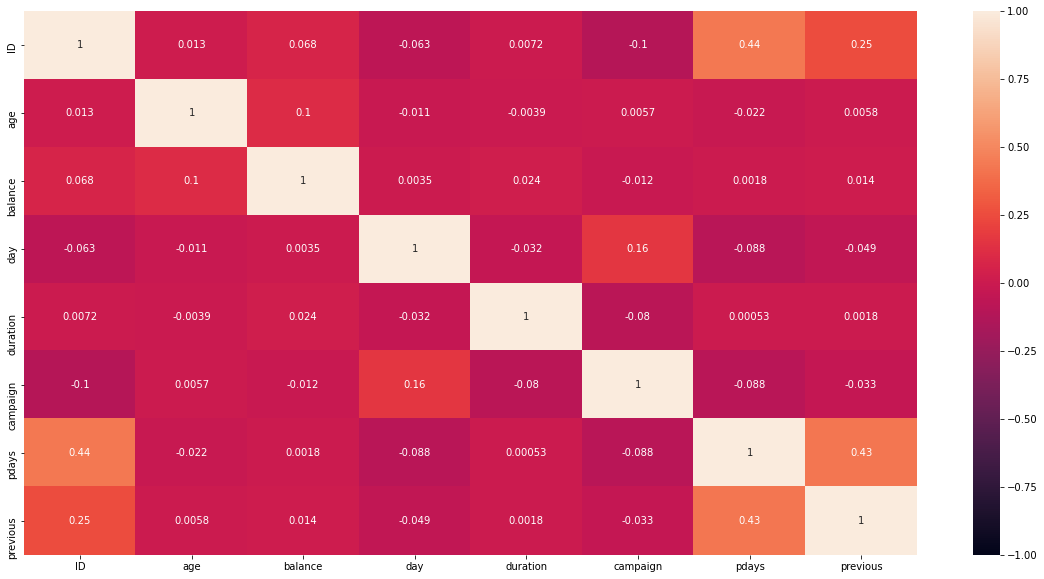

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(df_train.corr(), vmax = 1, vmin = -1, square = False, annot = True)

Number of Subscribers 

Text(0, 0.5, 'Count')

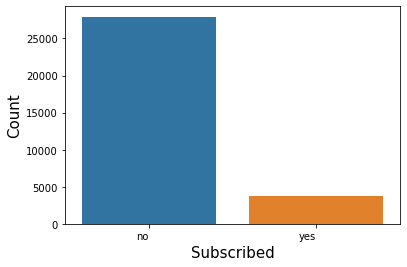

In [14]:
sns.countplot(x = 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Subscribed', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Binning of age for analysis 

In [15]:
age_group_train = []
for i in df_train['age']:
    if (i >= 18 and i <= 25):
        age_group_train.append('18-25')
    elif (i >= 26 and i <= 33):
        age_group_train.append('26-33')
    elif (i >= 34 and i <= 41):
        age_group_train.append('34-41')
    elif (i >= 42 and i <= 49):
        age_group_train.append('42-49')
    elif (i >= 50 and i <= 57):
        age_group_train.append('50-57')
    elif (i >= 58 and i <= 65):
        age_group_train.append('58-65')
    elif (i >= 66 and i <= 73):
        age_group_train.append('66-73')
    elif (i >= 74 and i <= 81):
        age_group_train.append('74-81')
    elif (i >= 82 and i <= 89):
        age_group_train.append('82-89')
    elif (i >= 90 and i <= 97):
        age_group_train.append('90-97')
    else:
        pass
df_train['age_group'] = age_group_train
age_group_test = []
for i in df_test['age']:
    if (i >= 18 and i <= 25):
        age_group_test.append('18-25')
    elif (i >= 26 and i <= 33):
        age_group_test.append('26-33')
    elif (i >= 34 and i <= 41):
        age_group_test.append('34-41')
    elif (i >= 42 and i <= 49):
        age_group_test.append('42-49')
    elif (i >= 50 and i <= 57):
        age_group_test.append('50-57')
    elif (i >= 58 and i <= 65):
        age_group_test.append('58-65')
    elif (i >= 66 and i <= 73):
        age_group_test.append('66-73')
    elif (i >= 74 and i <= 81):
        age_group_test.append('74-81')
    elif (i >= 82 and i <= 89):
        age_group_test.append('82-89')
    elif (i >= 90 and i <= 97):
        age_group_test.append('90-97')
    else:
        pass
df_test['age_group'] = age_group_test

Relation Between age group and subscription 

Text(0, 0.5, 'Count')

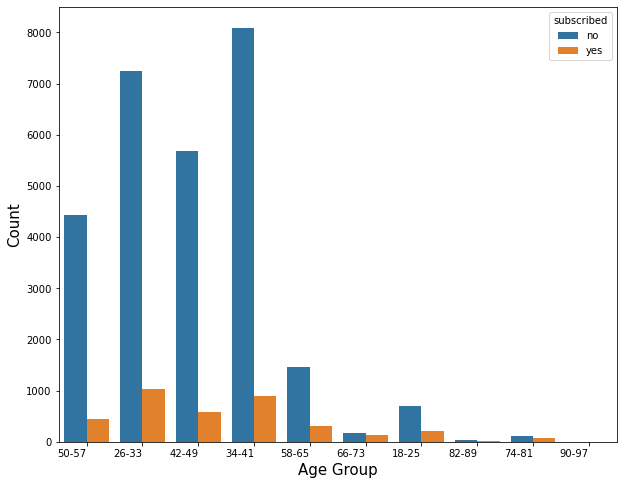

In [16]:
plt.figure(figsize = (10, 8))
sns.countplot(x ='age_group', hue = 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Age Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

28% of subscribers are between 26-33 years of age.
52% of subscribers are between 26-41 years of age.
68% of subscribers are between 26-49 years of age.
80% of subscribers are between 26-57 years of age.

Distribution of age 

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


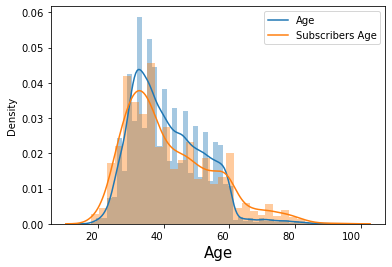

In [17]:
sns.distplot(df_train['age'])
sns.distplot(y_df['age'])
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Age', fontsize = 15)
plt.legend(['Age', 'Subscribers Age'])
plt.show()

Relation Between Type of Job and Subscription 

Text(0, 0.5, 'Count')

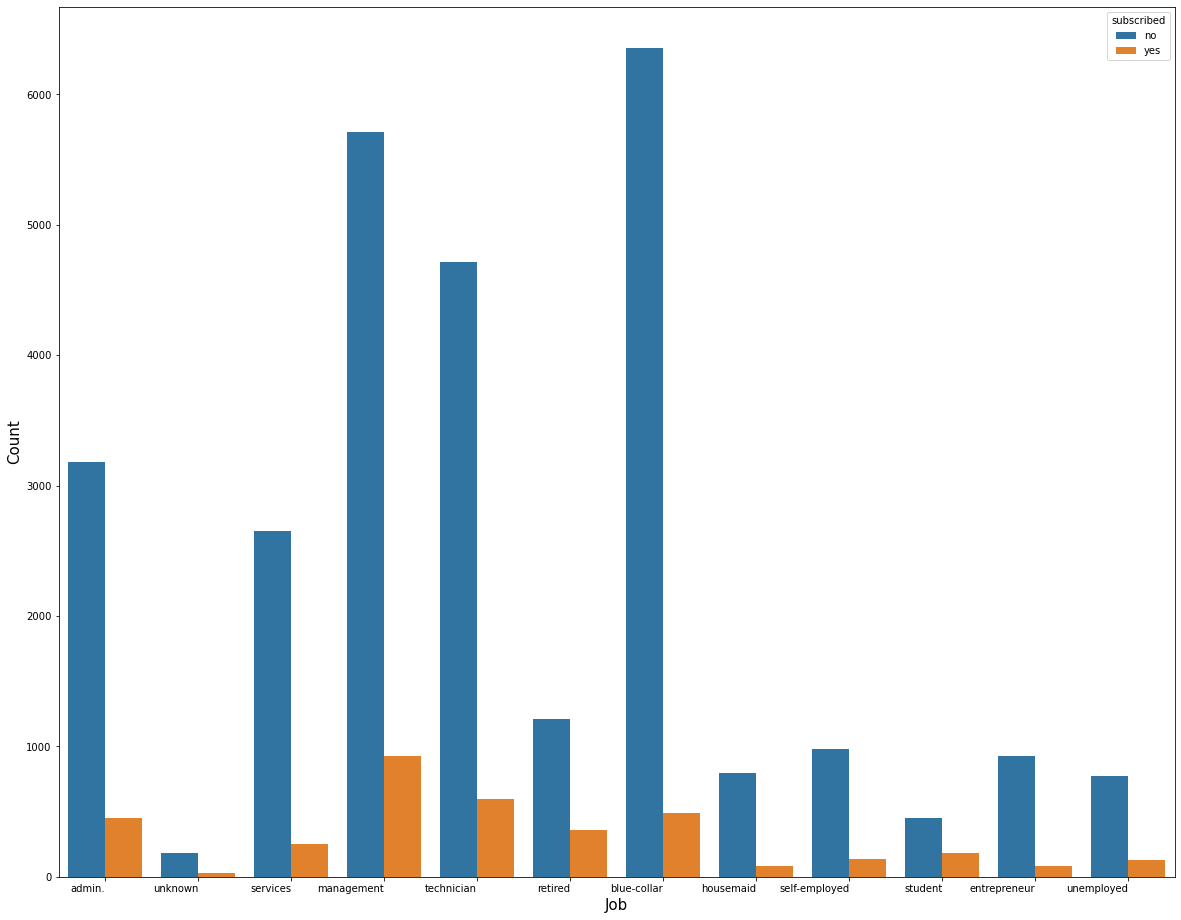

In [18]:
plt.figure(figsize = (20, 16))
sns.countplot(x ='job', hue = 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Job', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Relation between Maritial status and Subscription 

Text(0, 0.5, 'Count')

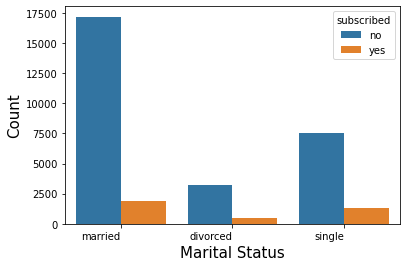

In [19]:
sns.countplot(x ='marital', hue = 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Marital Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Relation between Highest education and Subscription 

Text(0, 0.5, 'Count')

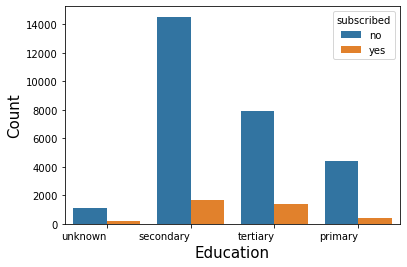

In [20]:
sns.countplot(x ='education', hue = 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Education', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Relation between Defaulters and Subscribers 

Text(0, 0.5, 'Count')

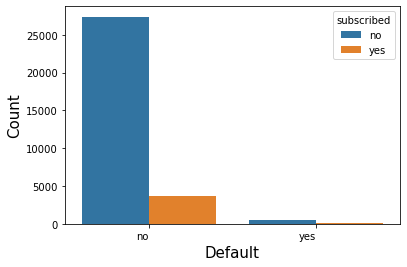

In [21]:
sns.countplot(x ='default', hue = 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Default', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Binning of Balance for Analysis 

In [22]:
balance_train = []
for i in df_train['balance']:
    if (i >= -14999 and i <= 0):
        balance_train.append('Negative Balance')
    elif (i >= 1 and i <= 15000):
        balance_train.append('0K - 15K')
    elif (i >= 15001 and i <= 30000):
        balance_train.append('15K - 30K')
    elif (i >= 30001 and i <= 45000):
        balance_train.append('30K - 45K')
    elif (i >= 45001 and i <= 60000):
        balance_train.append('45K - 60K')
    elif (i >= 60001 and i <= 75000):
        balance_train.append('60K - 75K')
    elif (i >= 75001 and i <= 90000):
        balance_train.append('75K - 90K')
    elif (i >= 90001 and i <= 105000):
        balance_train.append('90K - 105K')
    else:
        pass
df_train['balance_group'] = balance_train
balance_test = []
for i in df_test['balance']:
    if (i >= -14999 and i <= 0):
        balance_test.append('Negative Balance')
    elif (i >= 1 and i <= 15000):
        balance_test.append('0K - 15K')
    elif (i >= 15001 and i <= 30000):
        balance_test.append('15K - 30K')
    elif (i >= 30001 and i <= 45000):
        balance_test.append('30K - 45K')
    elif (i >= 45001 and i <= 60000):
        balance_test.append('45K - 60K')
    elif (i >= 60001 and i <= 75000):
        balance_test.append('60K - 75K')
    elif (i >= 75001 and i <= 90000):
        balance_test.append('75K - 90K')
    elif (i >= 90001 and i <= 105000):
        balance_test.append('90K - 105K')
    else:
        pass
df_test['balance_group'] = balance_test

Relation between balance and subscription 

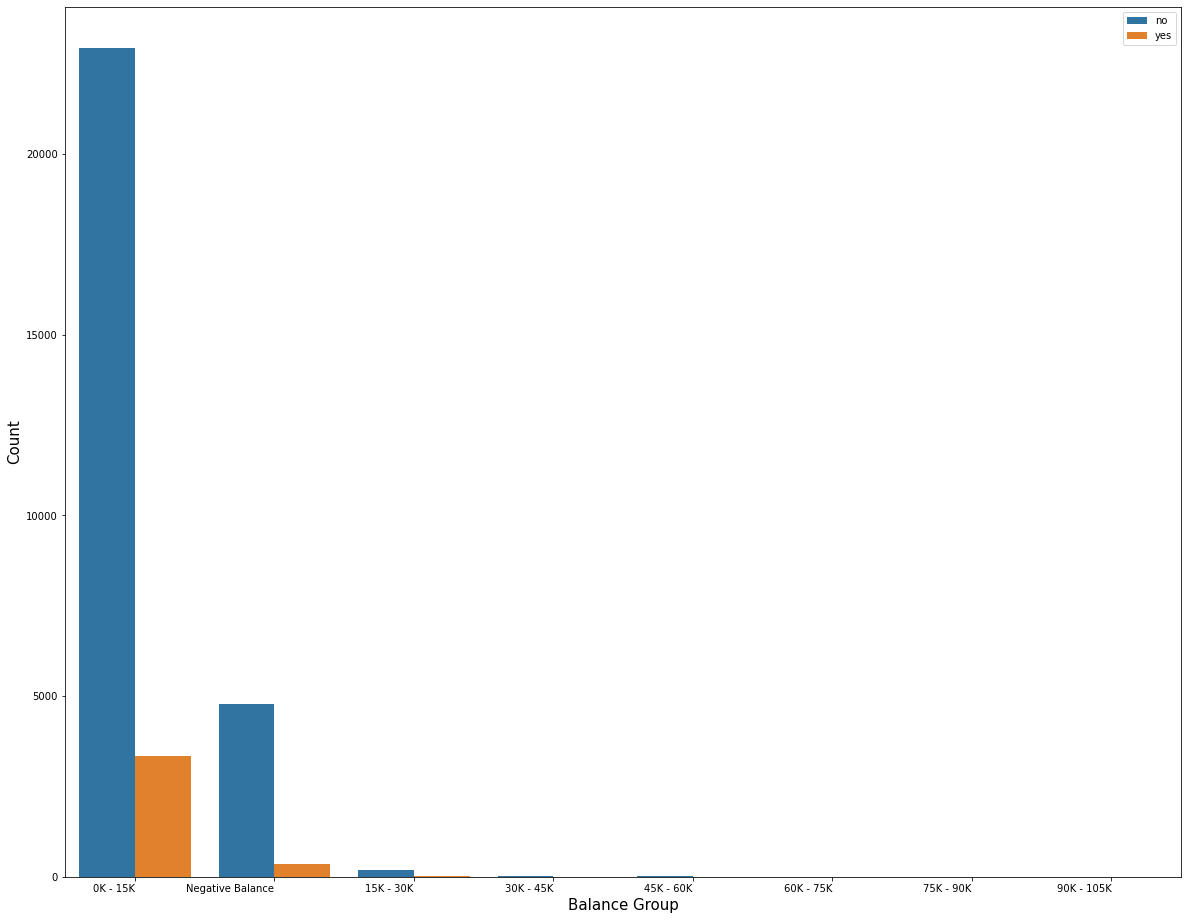

In [23]:
plt.figure(figsize = (20, 16))
sns.countplot(x ='balance_group', hue = 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Balance Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend(loc = 'upper right')

Distribution of Balance 

C:\Users\sanku\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sanku\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


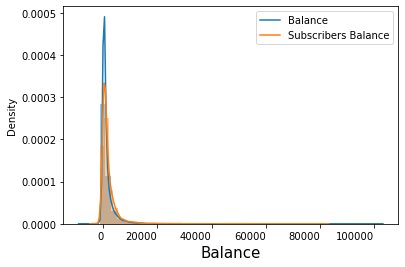

In [27]:
sns.distplot(df_train['balance'])
sns.distplot(y_df['balance'])
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Balance', fontsize = 15)
plt.legend(['Balance', 'Subscribers Balance'])
plt.show()

Transforming Balance 

C:\Users\sanku\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sanku\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


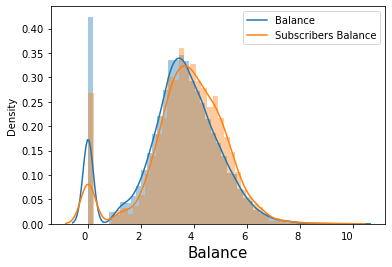

In [28]:
sns.distplot((df_train['balance']) ** (1/5))
sns.distplot((y_df['balance']) ** (1/5))
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Balance', fontsize = 15)
plt.legend(['Balance', 'Subscribers Balance'])
plt.show()
df_train['balance'] = df_train['balance'] ** (1/5)
df_test['balance'] = df_test['balance'] ** (1/5)
df_train['balance'] = df_train['balance'].fillna(df_train['balance'].mean())
df_test['balance'] = df_test['balance'].fillna(df_test['balance'].mean())

Relation Between Housing Loan and Subscription 

Text(0, 0.5, 'Count')

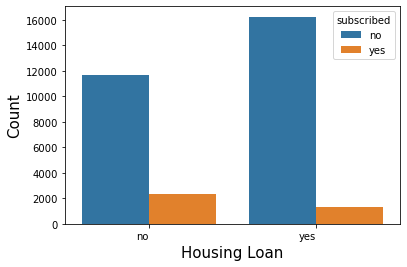

In [29]:
sns.countplot(x ='housing', hue = 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Housing Loan', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Relationship between Personal loan and subscription 

Text(0, 0.5, 'Count')

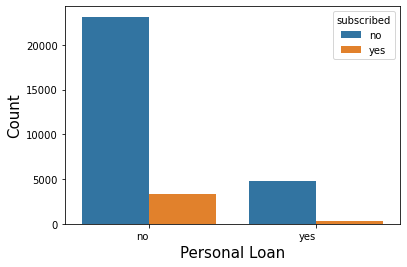

In [30]:
sns.countplot(x ='loan', hue = 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Personal Loan', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Relationship Between Medium of Contact and Subscription 

Text(0, 0.5, 'Count')

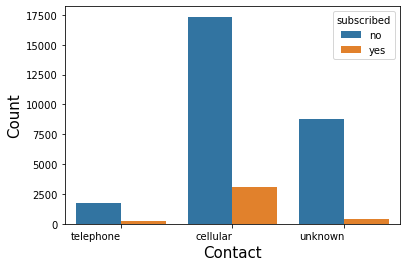

In [31]:
sns.countplot(x ='contact', hue = 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Contact', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Categorizing data column into week 

In [32]:
week_train = []
for i in df_train['day']:
    if i < 8:
        week_train.append(1)
    elif i >= 8 and i < 16:
        week_train.append(2)
    elif i >=16 and i < 22:
        week_train.append(3)
    else:
        week_train.append(4)
df_train['week'] = week_train
df_train = df_train.drop('day', axis = 1)
week_test = []
for i in df_test['day']:
    if i < 8:
        week_test.append(1)
    elif i >= 8 and i < 16:
        week_test.append(2)
    elif i >=16 and i < 22:
        week_test.append(3)
    else:
        week_test.append(4)
df_test['week'] = week_test
df_test = df_test.drop('day', axis = 1)

Relationship between the week the customer was contacted and subscription 

Text(0, 0.5, 'Count')

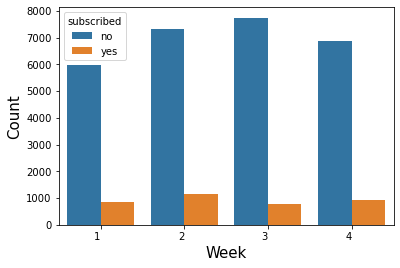

In [33]:
sns.countplot(x ='week', hue = 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Week', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Relationship between the month in which the customer was contacted and subscription 

Text(0, 0.5, 'Count')

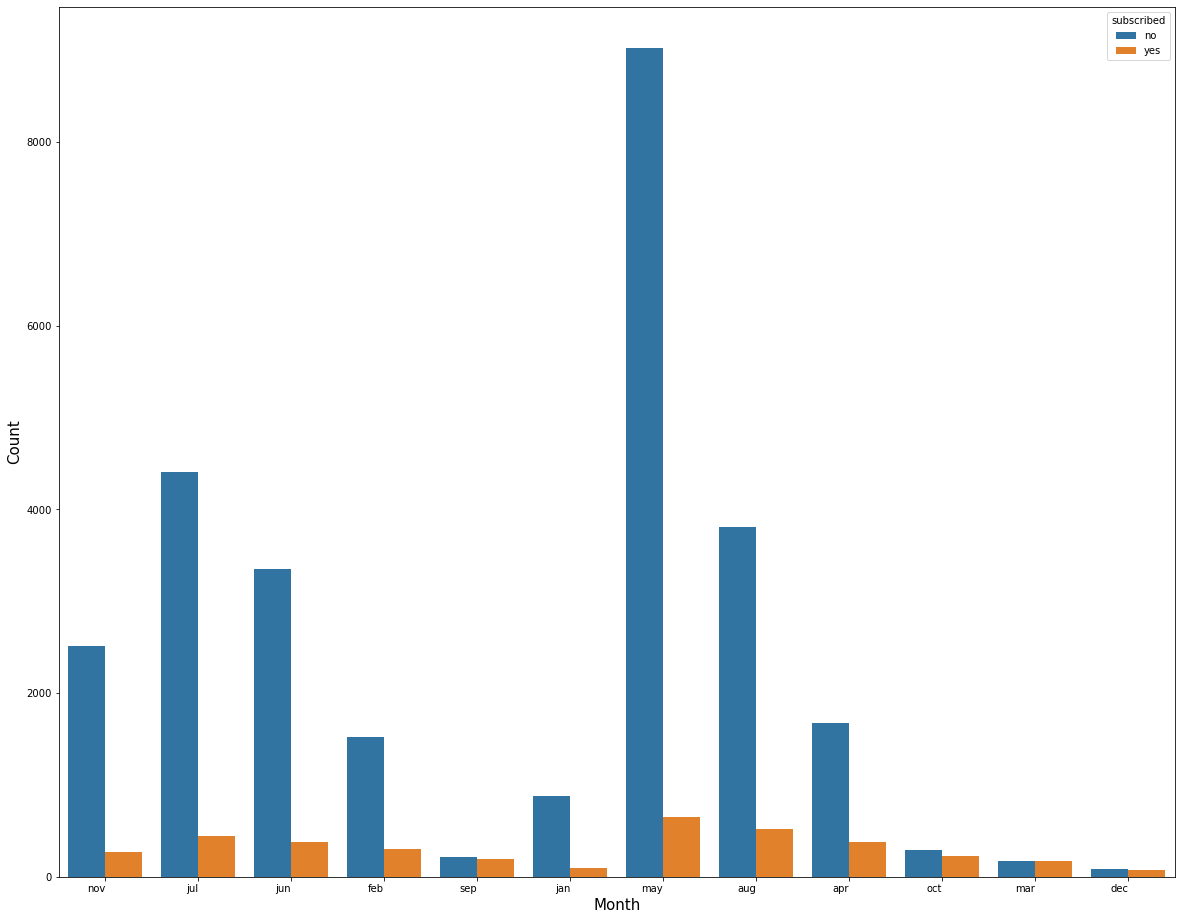

In [34]:
plt.figure(figsize = (20, 16))
sns.countplot(x ='month', hue = 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

binning of Duration of Contact for analysis 

In [35]:
duration_train = []
for i in df_train['duration']:
    if (i >= 0 and i <= 500):
        duration_train.append('0-500')
    elif (i >= 501 and i <= 1000):
        duration_train.append('501-1000')
    elif (i >= 1001 and i <= 1500):
        duration_train.append('1001-1500')
    elif (i >= 1501 and i <= 2000):
        duration_train.append('1501-2000')
    elif (i >= 2001 and i <= 2500):
        duration_train.append('2001 - 2500')
    elif (i >= 2501 and i <= 3000):
        duration_train.append('2501-3000')
    elif (i >= 3001 and i <= 3500):
        duration_train.append('3001-3500')
    elif (i >= 3501 and i <= 4000):
        duration_train.append('3501-4000')
    elif (i >= 4001 and i <= 4500):
        duration_train.append('4001-4500')
    elif (i >= 4501 and i <= 5000):
        duration_train.append('4501-5000')
    else:
        pass
df_train['duration_group'] = duration_train
duration_test = []
for i in df_test['duration']:
    if (i >= 0 and i <= 500):
        duration_test.append('0-500')
    elif (i >= 501 and i <= 1000):
        duration_test.append('501-1000')
    elif (i >= 1001 and i <= 1500):
        duration_test.append('1001-1500')
    elif (i >= 1501 and i <= 2000):
        duration_test.append('1501-2000')
    elif (i >= 2001 and i <= 2500):
        duration_test.append('2001 - 2500')
    elif (i >= 2501 and i <= 3000):
        duration_test.append('2501-3000')
    elif (i >= 3001 and i <= 3500):
        duration_test.append('3001-3500')
    elif (i >= 3501 and i <= 4000):
        duration_test.append('3501-4000')
    elif (i >= 4001 and i <= 4500):
        duration_test.append('4001-4500')
    elif (i >= 4501 and i <= 5000):
        duration_test.append('4501-5000')
    else:
        pass
df_test['duration_group'] = duration_test

Relation between duration of contact and subscription 

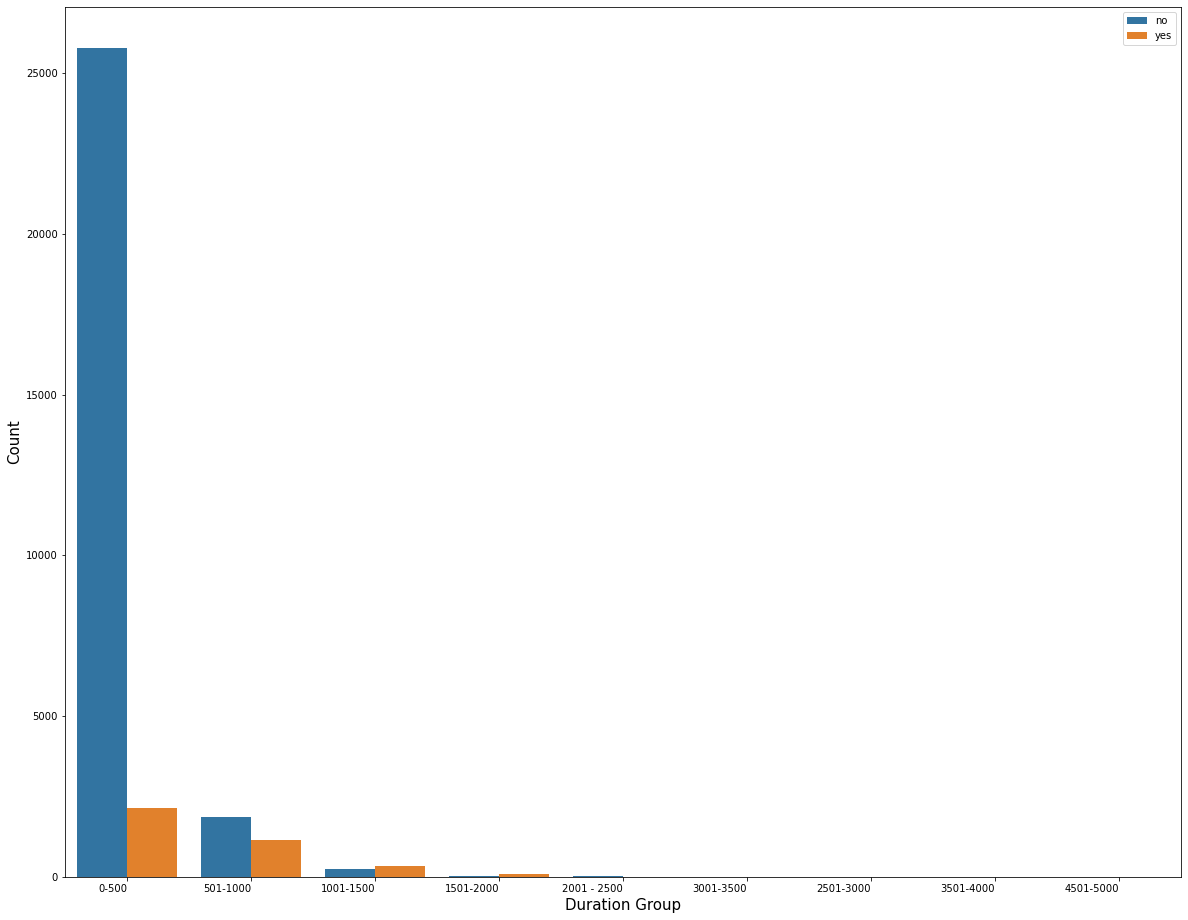

In [36]:
plt.figure(figsize = (20, 16))
sns.countplot(x ='duration_group', hue = 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Duration Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend(loc = 'upper right')

Distribution of duration of contact 

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


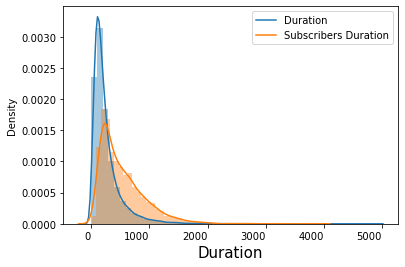

In [24]:
sns.distplot(df_train['duration'])
sns.distplot(y_df['duration'])
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Duration', fontsize = 15)
plt.legend(['Duration', 'Subscribers Duration'])
plt.show()

Transforming Duration of Contact 

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


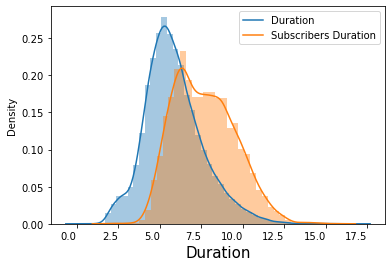

In [25]:
sns.distplot((df_train['duration']) ** (1/3))
sns.distplot((y_df['duration']) ** (1/3))
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Duration', fontsize = 15)
plt.legend(['Duration', 'Subscribers Duration'])
plt.show()
df_train['duration'] = df_train['duration'] ** (1/3)
df_test['duration'] = df_test['duration'] ** (1/3)

Binning of number of times a subscriber contacted in previous campaign for analysis 

In [26]:
campaign_train = []
for i in df_train['campaign']:
    if (i >= 1 and i <= 7):
        campaign_train.append('1-7')
    elif (i >= 8 and i <= 14):
        campaign_train.append('8-14')
    elif (i >= 15 and i <= 21):
        campaign_train.append('15-21')
    elif (i >= 22 and i <= 28):
        campaign_train.append('22-28')
    elif (i >= 29 and i <= 35):
        campaign_train.append('29-35')
    elif (i >= 36 and i <= 42):
        campaign_train.append('36-42')
    elif (i >= 43 and i <= 49):
        campaign_train.append('43-49')
    elif (i >= 50 and i <= 56):
        campaign_train.append('50-56')
    elif (i >= 57 and i <= 63):
        campaign_train.append('57-63')
    else:
        pass
df_train['campaign_group'] = campaign_train
campaign_test = []
for i in df_test['campaign']:
    if (i >= 1 and i <= 7):
        campaign_test.append('1-7')
    elif (i >= 8 and i <= 14):
        campaign_test.append('8-14')
    elif (i >= 15 and i <= 21):
        campaign_test.append('15-21')
    elif (i >= 22 and i <= 28):
        campaign_test.append('22-28')
    elif (i >= 29 and i <= 35):
        campaign_test.append('29-35')
    elif (i >= 36 and i <= 42):
        campaign_test.append('36-42')
    elif (i >= 43 and i <= 49):
        campaign_test.append('43-49')
    elif (i >= 50 and i <= 56):
        campaign_test.append('50-56')
    elif (i >= 57 and i <= 63):
        campaign_test.append('57-63')
    else:
        pass
df_test['campaign_group'] = campaign_test

Relation between number of times a subscriber contacted in previous campaign and subscription 

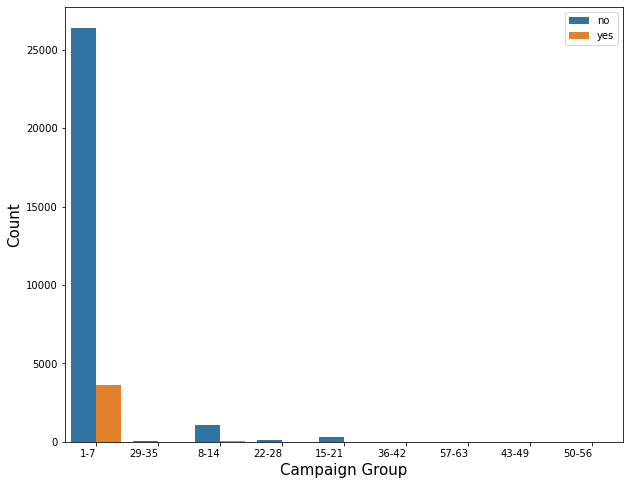

In [27]:
plt.figure(figsize = (10, 8))
sns.countplot(x ='campaign_group', hue= 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Campaign Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend(loc = 'upper right')

Transforming number of time a subscriber contacted in previous campaign 

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


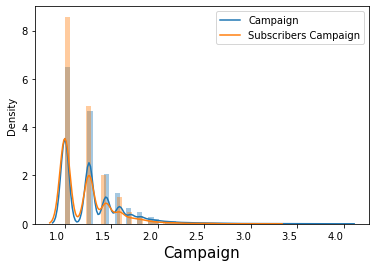

In [28]:
sns.distplot((df_train['campaign']) ** (1/3))
sns.distplot((y_df['campaign']) ** (1/3))
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Campaign', fontsize = 15)
plt.legend(['Campaign', 'Subscribers Campaign'])
plt.show()
df_train['campaign'] = df_train['campaign'] ** (1/3)
df_test['campaign'] = df_test['campaign'] ** (1/3)

Changing -1 to 0 days passed since last contact 

In [29]:
pdays_train = []
for i in df_train['pdays']:
    if i < 0:
        pdays_train.append(0)
    else:
        pdays_train.append(i)
df_train['pdays'] = pdays_train
pdays_test = []
for i in df_test['pdays']:
    if i < 0:
        pdays_test.append(0)
    else:
        pdays_test.append(i)
df_test['pdays'] = pdays_test

Binning of days passed since last contact for analysis 


In [30]:
pdays_train = []
for i in df_train['pdays']:
    if (i >= 0 and i <= 100):
        pdays_train.append('1-100')
    elif (i >= 101 and i <= 200):
        pdays_train.append('101-200')
    elif (i >= 201 and i <= 300):
        pdays_train.append('201-300')
    elif (i >= 301 and i <= 400):
        pdays_train.append('301-400')
    elif (i >= 401 and i <= 500):
        pdays_train.append('401-500')
    elif (i >= 501 and i <= 600):
        pdays_train.append('501-600')
    elif (i >= 601 and i <= 700):
        pdays_train.append('601-700')
    elif (i >= 701 and i <= 800):
        pdays_train.append('701-800')
    elif (i >= 801 and i <= 900):
        pdays_train.append('801-900')
    else:
        pass
df_train['pdays_group'] = pdays_train
pdays_test = []
for i in df_test['pdays']:
    if (i >= 0 and i <= 100):
        pdays_test.append('1-100')
    elif (i >= 101 and i <= 200):
        pdays_test.append('101-200')
    elif (i >= 201 and i <= 300):
        pdays_test.append('201-300')
    elif (i >= 301 and i <= 400):
        pdays_test.append('301-400')
    elif (i >= 401 and i <= 500):
        pdays_test.append('401-500')
    elif (i >= 501 and i <= 600):
        pdays_test.append('501-600')
    elif (i >= 601 and i <= 700):
        pdays_test.append('601-700')
    elif (i >= 701 and i <= 800):
        pdays_test.append('701-800')
    elif (i >= 801 and i <= 900):
        pdays_test.append('801-900')
    else:
        pass
df_test['pdays_group'] = pdays_test

Relation between Days passed since last contact and subscription 

Text(0, 0.5, 'Count')

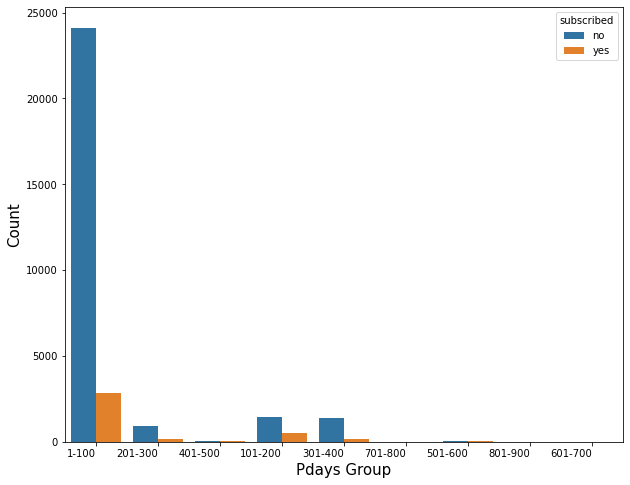

In [31]:
plt.figure(figsize = (10, 8))
sns.countplot(x ='pdays_group', hue= 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Pdays Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Distribution of days passed since last contact 

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 10 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 10 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


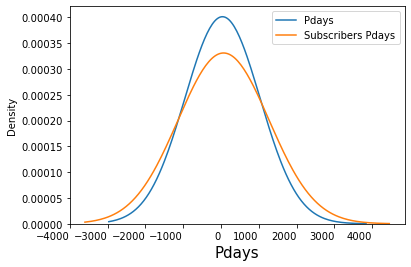

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


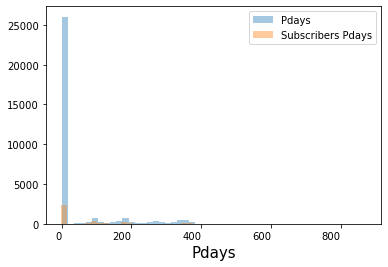

In [32]:
sns.kdeplot(df_train['pdays'], bw = 10)
sns.kdeplot(y_df['pdays'], bw = 10)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Pdays', fontsize = 15)
plt.legend(['Pdays', 'Subscribers Pdays'])
plt.show()
sns.distplot(df_train['pdays'], kde = False)
sns.distplot(y_df['pdays'], kde = False)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Pdays', fontsize = 15)
plt.legend(['Pdays', 'Subscribers Pdays'])
plt.show()

Transforming days passes since last contact 

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 10 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 10 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


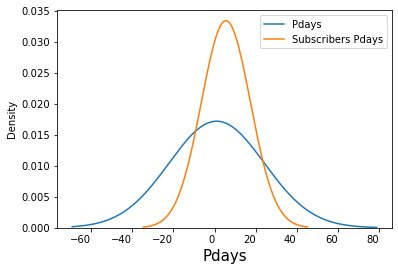

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


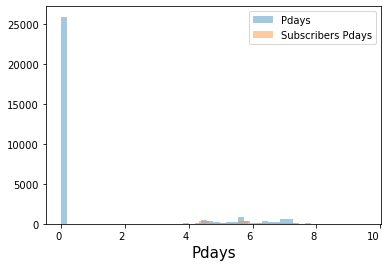

In [33]:
sns.kdeplot((df_train['pdays']) ** (1/3), bw = 10)
sns.kdeplot((y_df['pdays']) ** (1/3), bw = 10)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Pdays', fontsize = 15)
plt.legend(['Pdays', 'Subscribers Pdays'])
plt.show()
sns.distplot((df_train['pdays']) ** (1/3), kde = False)
sns.distplot((y_df['pdays']) ** (1/3), kde = False)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Pdays', fontsize = 15)
plt.legend(['Pdays', 'Subscribers Pdays'])
plt.show()
df_train['pdays'] = df_train['pdays'] ** (1/3)
df_test['pdays'] = df_test['pdays'] ** (1/3)

Binning number of times subscriber is conctacted in past 

In [34]:
previous_train = []
for i in df_train['previous']:
    if (i >= 0 and i <= 50):
        previous_train.append('1-50')
    elif (i >= 51 and i <= 100):
        previous_train.append('51-100')
    elif (i >= 101 and i <= 150):
        previous_train.append('101-150')
    elif (i >= 151 and i <= 200):
        previous_train.append('151-200')
    elif (i >= 201 and i <= 250):
        previous_train.append('201-250')
    elif (i >= 251 and i <= 300):
        previous_train.append('251-300')
    else:
        pass
df_train['previous_groups'] = previous_train
previous_test = []
for i in df_test['previous']:
    if (i >= 0 and i <= 50):
        previous_test.append('1-50')
    elif (i >= 51 and i <= 100):
        previous_test.append('51-100')
    elif (i >= 101 and i <= 150):
        previous_test.append('101-150')
    elif (i >= 151 and i <= 200):
        previous_test.append('151-200')
    elif (i >= 201 and i <= 250):
        previous_test.append('201-250')
    elif (i >= 251 and i <= 300):
        previous_test.append('251-300')
    else:
        pass
df_test['previous_groups'] = previous_test

Relation between number of times subscriber is contacted in past and subscription 

Distrubution of number of times subscriber is contacted in past 

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 10 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 10 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


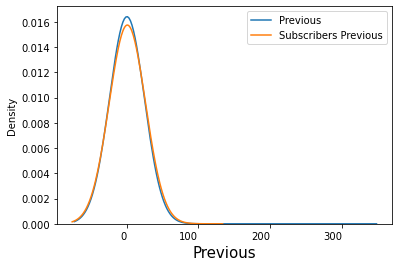

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


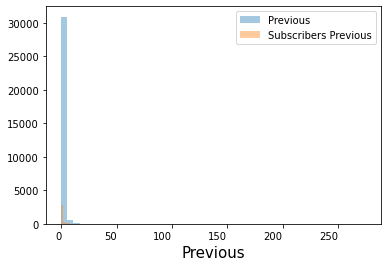

In [35]:
sns.kdeplot(df_train['previous'], bw = 10)
sns.kdeplot(y_df['previous'], bw = 10)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Previous', fontsize = 15)
plt.legend(['Previous', 'Subscribers Previous'])
plt.show()
sns.distplot(df_train['previous'], kde = False)
sns.distplot(y_df['previous'], kde = False)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Previous', fontsize = 15)
plt.legend(['Previous', 'Subscribers Previous'])
plt.show()

Transforming number of times subscriber is contacted in past 

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 10 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 10 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


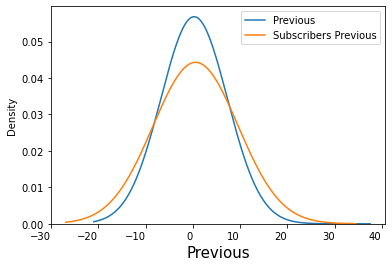

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


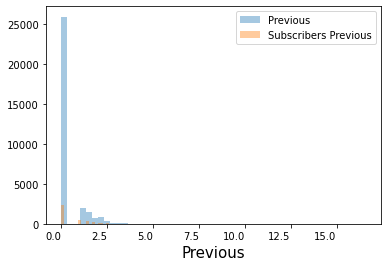

In [36]:
sns.kdeplot((df_train['previous']) ** (1/2), bw = 10)
sns.kdeplot((y_df['previous']) ** (1/2), bw = 10)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Previous', fontsize = 15)
plt.legend(['Previous', 'Subscribers Previous'])
plt.show()
sns.distplot((df_train['previous']) ** (1/2), kde = False)
sns.distplot((y_df['previous']) ** (1/2), kde = False)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Previous', fontsize = 15)
plt.legend(['Previous', 'Subscribers Previous'])
plt.show()
df_train['previous'] = df_train['previous'] ** (1/2)
df_test['previous'] = df_test['previous'] ** (1/2)

Relationship between previous outcome and subscription 

Text(0, 0.5, 'Count')

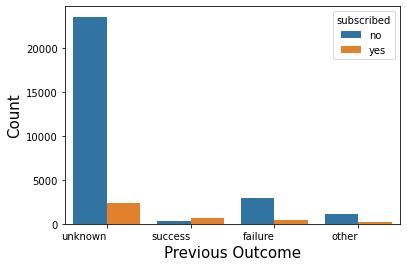

In [37]:
sns.countplot(x ='poutcome', hue = 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Previous Outcome', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

In [40]:
df_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,age_group,balance_group,campaign_group,pdays_group,previous_groups
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,2.714418,1.817121,0.0,0.0,unknown,26-33,0K - 15K,1-7,1-100,1-50
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,7.191966,1.000000,0.0,0.0,unknown,74-81,0K - 15K,1-7,1-100,1-50
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,8.776383,1.000000,0.0,0.0,unknown,26-33,0K - 15K,1-7,1-100,1-50
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,4.020726,1.259921,0.0,0.0,unknown,50-57,0K - 15K,1-7,1-100,1-50
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,4.805896,1.000000,0.0,0.0,unknown,42-49,Negative Balance,1-7,1-100,1-50


Encoding categorical columns 

In [42]:
df_train_dummies = pd.get_dummies(df_train[['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome']], drop_first = True)
df_train_label = df_train[['education', 'month']].apply(LabelEncoder().fit_transform)
df_test_dummies = pd.get_dummies(df_test[['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome']], drop_first = True)
df_test_label = df_test[['education', 'month']].apply(LabelEncoder().fit_transform)
df_train = pd.concat([df_train.drop(['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome', 'education', 'month'], axis = 1), df_train_dummies, df_train_label], axis = 1)
df_test = pd.concat([df_test.drop(['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome', 'education', 'month'], axis = 1), df_test_dummies, df_test_label], axis = 1)

In [44]:
df_train = df_train.drop(['ID', 'age_group', 'balance_group', 'campaign_group', 'pdays_group', 'previous_groups'], axis = 1)
df_test = df_test.drop(['ID', 'age_group', 'balance_group', 'campaign_group', 'pdays_group', 'previous_groups'], axis = 1)

In [45]:
df_train['subscribed'] = df_train['subscribed'].map({'yes': 1, 'no': 0})

In [46]:
df_train_scaled = pd.DataFrame(StandardScaler().fit_transform(df_train.drop('subscribed', axis = 1)), columns = df_test.columns)
df_test_scaled = pd.DataFrame(StandardScaler().fit_transform(df_test), columns = df_test.columns)

Feature Selection 

In [47]:
pca_columns = []
for i in range(df_train_scaled.shape[1]):
    pca_columns.append('PC' + str(i+1))
pca_model = PCA()
pca_model.fit(df_train_scaled)
df_pca_train = pd.DataFrame(pca_model.transform(df_train_scaled), columns = pca_columns)
explained_info_train = pd.DataFrame(pca_model.explained_variance_ratio_, columns=['Explained Info']).sort_values(by = 'Explained Info', ascending = False)
imp = []
for i in range(explained_info_train.shape[0]):
    imp.append(explained_info_train.head(i).sum())
explained_info_train_sum = pd.DataFrame()
explained_info_train_sum['Variable'] = pca_columns
explained_info_train_sum['Importance'] = imp
explained_info_train_sum

,Variable,Importance
0,PC1,Explained Info 0.0 dtype: float64
1,PC2,Explained Info 0.113951 dtype: float64
2,PC3,Explained Info 0.192186 dtype: float64
3,PC4,Explained Info 0.258881 dtype: float64
4,PC5,Explained Info 0.307622 dtype: float64
5,PC6,Explained Info 0.353959 dtype: float64
6,PC7,Explained Info 0.394461 dtype: float64
7,PC8,Explained Info 0.43309 dtype: float64
8,PC9,Explained Info 0.471137 dtype: float64
9,PC10,Explained Info 0.507759 dtype: float64


In [48]:
pca_columns = []
for i in range(19):
    pca_columns.append('PC' + str(i+1))
pca_model = PCA(n_components = 19)
pca_model.fit(df_train_scaled)
df_pca_train = pd.DataFrame(pca_model.transform(df_train_scaled), columns = pca_columns)

In [49]:
df_pca_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-0.571122,1.194901,2.189240,-0.231161,0.127129,1.334073,1.768407,0.670021,0.276009,0.529774,0.008122,0.142475,0.081630,0.588771,0.106732,-0.889046,2.569041,1.081345,0.226742
1,-0.881439,0.464468,1.532703,0.201468,0.023683,0.915968,0.475362,0.934121,-1.602247,2.916668,-2.911563,8.177837,-2.185926,4.693630,3.110809,3.965830,-0.061786,-0.098394,-1.522966
2,-0.689332,-0.048040,-0.911118,-0.240025,-0.295431,-0.814964,0.782649,-1.726606,-2.424333,-0.913358,0.491274,0.303285,0.103248,0.486114,-0.908011,0.116769,-0.111214,0.666047,0.291137
3,4.510163,0.168221,2.094708,-1.353012,2.352895,-0.266640,-1.220366,-0.172763,0.039424,-0.169253,-0.458679,0.150418,-2.880424,-1.676181,-1.895689,1.260017,0.394675,-0.350161,0.257991
4,-0.536282,-0.082300,-0.213692,0.313794,-0.365011,-2.292767,-1.768338,0.577751,-0.587526,-0.294876,0.093634,0.439688,0.941143,0.596992,0.010911,-0.689622,0.417975,0.577589,0.270587


In [50]:
pca_model = PCA(n_components = 19)
pca_model.fit(df_test_scaled)
df_pca_test = pd.DataFrame(pca_model.transform(df_test_scaled), columns = pca_columns)

In [51]:
X = df_pca_train
y = df_train['subscribed']

In [52]:
df_train['subscribed'].value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

In [53]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)
y_smote.value_counts()

NameError: name 'SMOTE' is not defined

Train, Validation and Test data sets 

In [66]:
X_train, X_val, y_train, y_val = train_test_split(X_smote, y_smote, test_size = 0.3, random_state = 17)
X_test = df_pca_test

NameError: name 'X_smote' is not defined

In [67]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

NameError: name 'X_train' is not defined

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

In [ ]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), SVC(), XGBClassifier()]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'SVC', 'XGBClassifier']
accuracy_train = []
accuracy_val = []
for model in models:
    mod = model
    mod.fit(X_train, y_train)
    y_pred_train = mod.predict(X_train)
    y_pred_val = mod.predict(X_val)
    accuracy_train.append(accuracy_score(y_train, y_pred_train))
    accuracy_val.append(accuracy_score(y_val, y_pred_val))
data = {'Modelling Algorithm' : model_names, 'Train Accuracy' : accuracy_train, 'Validation Accuracy' : accuracy_val}
data = pd.DataFrame(data)
data['Difference'] = ((np.abs(data['Train Accuracy'] - data['Validation Accuracy'])) * 100)/(data['Train Accuracy'])
data.sort_values(by = 'Validation Accuracy', ascending = False)

In [ ]:
knc = KNeighborsClassifier()
possible_parameter_values = {'n_neighbors' : range(1, 100)}
knc_rs_cv = RandomizedSearchCV(estimator = knc, param_distributions = possible_parameter_values, cv = 10, scoring = 'accuracy')
knc_rs_cv.fit(X_train, y_train)
knc_rs_cv.best_params_

Best score 

In [ ]:
knc_rs_cv.best_score_

In [ ]:
Checking the model 

In [ ]:
knc = KNeighborsClassifier(n_neighbors = 8)
knc.fit(X_train, y_train)
y_pred_val = knc.predict(X_val)

Accuracy 

In [ ]:
accuracy_score(y_val, y_pred_val)

Final model and Prediction 

In [ ]:
knc = KNeighborsClassifier(n_neighbors = 8)
knc.fit(X_train, y_train)
y_pred_test = knc.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test, columns = ['Prediction'])
y_pred_test.head()

In [ ]:
Exporting Predictions to CSV

In [ ]:
y_pred_test.to_csv('Prediction.csv')

Relation beween Dependent Variables and Subscription 

In [ ]:
pca_columns = []
for i in range(19):
    pca_columns.append('PC' + str(i+1))
org_var = pd.DataFrame(pca_model.components_, index = pca_columns, columns = df_train_scaled.columns)
values = []
for i in org_var.columns:
    values.append(org_var[i].sum())
dep_var = pd.DataFrame()
dep_var['Variables'] = df_train_scaled.columns
dep_var['Values'] = values
dep_var.sort_values(by = 'Values', ascending = False)